In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

#### Задание 1
Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [2]:
class GradientBoosting():
    def __init__(self, n_trees, min_leaf, max_depth, criteria, coefs, eta, tree_type=0):
        self.n_trees = n_trees
        self.min_leaf = min_leaf
        self.max_depth = max_depth
        self.criteria = criteria
        self.coefs = coefs
        self.eta = eta
        self.tree_type=tree_type
        
        self.trees = []
        self.train_errors = []
        self.test_errors = []

        
    def fit(self, X_train, X_test, y_train, y_test):        
        for i in range(n_trees):
            if self.tree_type == 0:
                tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)
            else:
                tree = Tree(n_features=4, min_leaf=self.min_leaf, max_depth=self.max_depth, criteria=self.criteria)

            # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
            # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X_train, y_train)
                self.trees.append(tree)
                
                self.train_errors.append(self.mse(y_train, self.predict(X_train)))
                self.test_errors.append(self.mse(y_test, self.predict(X_test)))
            else:
                # Получим ответы на текущей композиции                
                target = self.predict(X_train)
                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit(X_train, y_train - target)
                
                self.trees.append(tree)
                
                self.train_errors.append(self.mse(y_train, self.predict(X_train)))
                self.test_errors.append(self.mse(y_test, self.predict(X_test)))
       
       
    def predict(self, X):        
        # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
        # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
               
        prediction = []
        for x in X:
            prediction_x = 0           
            for alg, coef in zip(self.trees, self.coefs):
                prediction_x += self.eta * coef * alg.predict([x])[0]
            prediction.append(prediction_x)           
            
        return np.array(prediction).flatten()     

        
    def mse(self, y, y_pred):
        return np.mean((y - y_pred)**2)

In [3]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Зависимость ошибки от количества деревьев в ансамбле

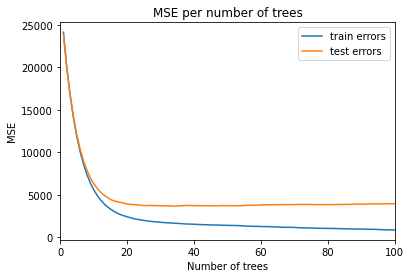

In [4]:
n_trees = 100
min_leaf = 1
max_depth = 3
criteria='gini'
coefs = [1] * n_trees
eta = 0.1

model_gb = GradientBoosting(n_trees, min_leaf, max_depth, criteria, coefs, eta)
model_gb.fit(X_train, X_test, y_train, y_test)

train_errors_gb = model_gb.train_errors
test_errors_gb = model_gb.test_errors

x = list(range(1, n_trees+1))

plt.xlim(0, n_trees)
plt.plot(x, train_errors_gb, label='train errors')
plt.plot(x, test_errors_gb, label='test errors')
plt.title('MSE per number of trees')
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.show()

In [5]:
test_errors_gb[-1]

3940.0835038138825

#### Вывод: 
С увелиением числв деревьев в ансамбле ошибка на тестовой выборке падает до определенного уровня, а потом стабилизируется, ошибка на обучающей выборке продолжает падать. Увеличивать число деревев в ансамбле после достижения этого уровня нецелесообразно.

#### Зависимость ошибки от максимальной глубины деревьев в ансамбле

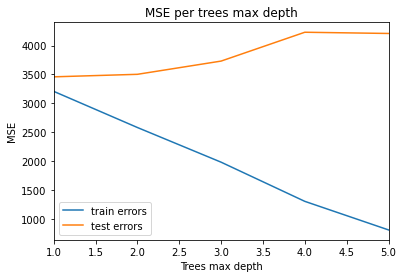

In [6]:
n_trees = 25
tree_max_depth = 5

train_errors = []
test_errors = []
for i in range(1, tree_max_depth+1):
    max_depth = i
    
    model_gb = GradientBoosting(n_trees, min_leaf, max_depth, criteria, coefs, eta)
    model_gb.fit(X_train, X_test, y_train, y_test)

    train_err = model_gb.train_errors[-1]
    test_err = model_gb.test_errors[-1]
    
    train_errors.append(train_err)
    test_errors.append(test_err)

x = list(range(1, tree_max_depth+1))

plt.xlim(1, tree_max_depth)
plt.plot(x, train_errors, label='train errors')
plt.plot(x, test_errors, label='test errors')
plt.title('MSE per trees max depth')
plt.xlabel('Trees max depth')
plt.ylabel('MSE')
plt.legend(loc='lower left')
plt.show()

#### Вывод: 
С увеличением максимальной глубины деревьев в ансамбле c уровня выше 2 ошибка начинает заметно расти из-за переобучения модели. При этом на обучающей выборке с увеличением максимальной глубины деревьев в ансамбле ошибка снижается.

#### Задание 2*
Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [7]:
class StochasticGradientBoosting():
    def __init__(self, n_trees, min_leaf, max_depth, criteria, coefs, eta, tree_type=0):
        self.n_trees = n_trees
        self.min_leaf = min_leaf
        self.max_depth = max_depth
        self.criteria = criteria
        self.coefs = coefs
        self.eta = eta
        self.tree_type=tree_type
        
        self.trees = []
        self.train_errors = []
        self.test_errors = []
        
    
    def get_bootstrap(self, X, y):
        n_samples = int(0.5 * X.shape[0])
        
        bootstrap = []         
        for i in range(self.n_trees):
            ind = np.random.choice(X.shape[0], n_samples, replace=False)
            b_X = X[ind]
            b_y = y[ind]  
            
            bootstrap.append((b_X, b_y))
            
        return bootstrap    

        
    def fit(self, X_train, X_test, y_train, y_test):
        bootstrap = self.get_bootstrap(X_train, y_train)       
        
        for i in range(n_trees):
            if self.tree_type == 0:
                tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)
            else:
                tree = Tree(n_features=4, min_leaf=self.min_leaf, max_depth=self.max_depth, criteria=self.criteria)
                
            b_X_train, b_y_train = bootstrap[i]     

            # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
            # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                
                tree.fit(b_X_train, b_y_train)
                self.trees.append(tree)
                
                self.train_errors.append(self.mse(b_y_train, self.predict(b_X_train)))
                self.test_errors.append(self.mse(y_test, self.predict(X_test)))
            else:
                # Получим ответы на текущей композиции                
                target = self.predict(b_X_train)
                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit(b_X_train, b_y_train - target)
                
                self.trees.append(tree)
                
                self.train_errors.append(self.mse(b_y_train, self.predict(b_X_train)))
                self.test_errors.append(self.mse(y_test, self.predict(X_test)))
       
       
    def predict(self, X):        
        # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
        # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
               
        prediction = []
        for x in X:
            prediction_x = 0           
            for alg, coef in zip(self.trees, self.coefs):
                prediction_x += self.eta * coef * alg.predict([x])[0]
            prediction.append(prediction_x)           
            
        return np.array(prediction).flatten()     

        
    def mse(self, y, y_pred):
        return np.mean((y - y_pred)**2)

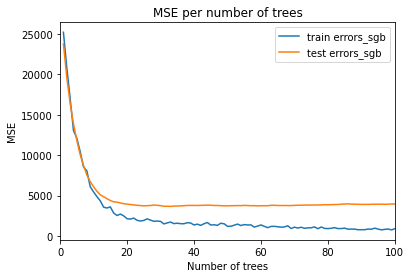

In [8]:
n_trees = 100
min_leaf = 1
max_depth = 3
criteria='gini'
coefs = [1] * n_trees
eta = 0.1

model_sgb = StochasticGradientBoosting(n_trees, min_leaf, max_depth, criteria, coefs, eta)
model_sgb.fit(X_train, X_test, y_train, y_test)

train_errors_sgb = model_sgb.train_errors
test_errors_sgb = model_sgb.test_errors

x = list(range(1, n_trees+1))

plt.xlim(0, n_trees)
plt.plot(x, train_errors_sgb, label='train errors_sgb')
plt.plot(x, test_errors_sgb, label='test errors_sgb')
plt.title('MSE per number of trees')
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.show()

In [9]:
test_errors_sgb[-1]

3948.735574907356

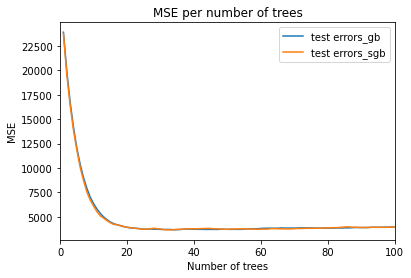

In [10]:
x = list(range(1, n_trees+1))

plt.xlim(0, n_trees)
plt.plot(x, test_errors_gb, label='test errors_gb')
plt.plot(x, test_errors_sgb, label='test errors_sgb')
plt.title('MSE per number of trees')
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.show()

In [11]:
test_errors_gb[-1], test_errors_sgb[-1]

(3940.0835038138825, 3948.735574907356)

#### Вывод 
Результаты стохастического градиентного бустинга с размером подвыборки равным 0.5 сопоставимы с результатами градиентного бустинга. 

#### Задание 3*
Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.

In [12]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [13]:
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()        
        
    def predict(self):              
        prediction = np.mean(self.labels)        
        return prediction

In [14]:
class Tree:
    
    def __init__(self, n_features, min_leaf, max_depth, criteria):
        self.n_features = n_features
        self.min_leaf = min_leaf
        self.max_depth = max_depth
        self.criteria = criteria
        
        self.current_depth = 0
             
        
    def info_criteria(self, labels):
        if self.criteria=='variance': 
            return np.mean((labels - np.mean(labels))**2) 
        #  подсчет количества объектов разных классов
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1

        #  расчет критерия
        entropy_ = 0
        impurity = 1    
        for label in classes:
            p = classes[label] / len(labels)
            entropy_ -= p * np.log2(p)
            impurity -= p ** 2    

        if self.criteria == 'entropy':        
            return entropy_
        elif self.criteria == 'gini':
            return impurity
        
        
    # Расчет качества
    def quality(self, true_labels, false_labels, current_criteria):        
        # доля выбоки, ушедшая в левое поддерево
        p = float(true_labels.shape[0]) / (true_labels.shape[0] + false_labels.shape[0])
        return current_criteria - p * self.info_criteria(true_labels) - (1 - p) * self.info_criteria(false_labels)         

        
    # Разбиение датасета в узле
    def split(self, data, labels, index, t):

        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)

        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels 
        
        
    # Нахождение наилучшего разбиения
    def find_best_split(self, data, labels):

        current_criteria = self.info_criteria(labels)

        best_quality = 0
        best_t = None
        best_index = None
        
        random.seed(42)
        selected_features =  random.sample(range(data.shape[1]), self.n_features)

        for index in selected_features:
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < self.min_leaf or len(false_data) < self.min_leaf:
                    continue

                current_quality = self.quality(true_labels, false_labels, current_criteria)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index
                    
        return best_quality, best_t, best_index
          
        
    # Построение дерева с помощью рекурсивной функции
    def build_tree(self, data, labels): 

        quality, t, index = self.find_best_split(data, labels)        

        #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if quality == 0:
            return Leaf(data, labels)
        
        if self.current_depth <= self.max_depth:
            return Leaf(data, labels)

        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)        

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels)
        false_branch = self.build_tree(false_data, false_labels)
        
        self.current_depth += 1
        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева        
        return Node(index, t, true_branch, false_branch)
    
    
    def fit(self, data, labels):
        self.my_tree = self.build_tree(data, labels)
        
    
    def classify_object(self, obj, node):
        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.classify_object(obj, node.true_branch)
        else:
            return self.classify_object(obj, node.false_branch)
        
        
    def predict(self, data):        
        classes = []
        for obj in data:
            prediction = self.classify_object(obj, self.my_tree)        
            classes.append(prediction)
        return classes

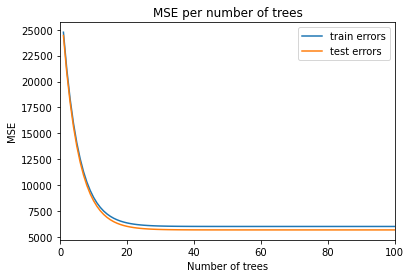

In [15]:
n_trees = 100
min_leaf = 1
max_depth = 3
criteria='gini'
coefs = [1] * n_trees
eta = 0.1

model_gb = GradientBoosting(n_trees, min_leaf, max_depth, criteria, coefs, eta, tree_type=1)
model_gb.fit(X_train, X_test, y_train, y_test)

train_errors = model_gb.train_errors
test_errors = model_gb.test_errors

x = list(range(1, n_trees+1))

plt.xlim(0, n_trees)
plt.plot(x, train_errors, label='train errors')
plt.plot(x, test_errors, label='test errors')
plt.title('MSE per number of trees')
plt.xlabel('Number of trees')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.show()

In [16]:
test_errors[-1]

5680.036719132583

#### Вывод: 
Качество алгоритма с DecisionTreeRegressor из sklearn выше, чем с Tree из ДЗ 4 - ниже MSE на тестовой выборке. На 100 деревьях MSE первого - 3940, второго - 5680.